<span style='font-family:Arial'><span style='font-size:large'>שלום לכולם.ן לפניכם מספר הוראות שלאחר השלמתן תוכלו גם אתם להריץ את הסימולציה.</span></span>

<span style='font-family:Arial'><span style='font-size:large'>ראשית עליכם להריץ את החלק הראשון אם אתם מחפשים סימולצי</span></span>  
<span style='font-family:Arial'><span style='font-size:large'>ה רק של כדור הארץ והשמש דלגו על החלק הבא ואם לא המשיכו לקרוא, בכדי ל</span></span>  
<span style='font-family:Arial'><span style='font-size:large'>הגיע לתנועות כוכבים כוכבים שונות. ניתן לשנות את מסת השמש מסת כדור הארץ כמות השניות ביום הכוכב בו אתם נמצאים והמהירות בנקודה הרחוקה מן הגוף אותו אנו מקיפים ותגדירו בחלק בו כתוב מיקום "מיקום התחלתי כדור הארץ" את מיקום הכוכבד החדש ביחס לגוף השני. בחלק של הלולאה תשנו את ה "365" ב "while t&lt;1\_365\_daysec: " לכמות הימים אשר לוקח לגופים להשלים סיבוב אחד סביב השני .</span></span>

<span style='font-family:Arial'><span style='font-size:large'>לאחר מכן הרציו את הבלוק הבא בו נמצאות הפונקציות המחשבות את השטחים הכלואים. אם בחרתם לשנות את הפרמטרים לאלו של כוכב אחר השתמשו בפונ"otherplanet\(day,other\_day,day\_count\)" והכניסו פרמטרים של יום התחלתי מבין מספר הימים בשנה אינטגר, יום אחר בשנה אינטגר גם ורצף ימים מסויים.</span></span>

<span style='font-family:Arial'><span style='font-size:large'>לאחר מכן במידה ולא ישניתם את הפרמטרים הריצו את הבלוק השלישי ובחרו תאריכים בשנה ומספר ימים אשר השטחים הכלואים ביניהם יוצגו ויודפסו . </span></span>

<span style='font-size:large'><span style='font-family:Arial'>לאחר שסיימתם את כל זה כעת הריצו את הבלוק הסופי וחכו כדקה עד שייצור לכם סרטון מיוחד משלכם של תנועת הכוכבים </span></span>:smiley: 

<img src="https://cocalc.com/dcfd254c-bc15-42b7-8ab6-a095507c241a/raw/.smc/jupyter/blobs/a.png?sha1=0a0b0667f329e809e5d818142a12764aad46b232&attempts=0"   width="600
px"  height="600
px"  title="תוצאה הסופית" style="object-fit:cover"/>



In [9]:
# setup the starting constants

G = 6.67e-11                # constant G
Ms = 2.0e30                 # שמש
Me = 5.972e24               # כדור הארץ
AU = 1.5e11                 # יחידה אסטרונומית, מרחק ממוצע כדור הארץ מהשמש
daysec = 24.0*60*60         # כמות השניות ביום
e_ap_v = 29400        # המהירות בנקודה הרחוקה מהשמש
gravconst_e = G*Me*Ms       # חוק הכבידה האוניברסלית של ניוטון

# setup the starting conditions

# earth
xe,ye = 1.0167*AU,0         # מיקום התחלתי כדור הארץ
xve,yve = 0,e_ap_v          # מיקום התחלתי שמש 

# sun
xs,ys   = 0,0               # מיקום התחלתי של השמש בראשית הצירים
xvs,yvs = 0,0               # מהיורת התחלתית של השמש

#time
t = 0.0                     # זמן התחלתי
dt = 1*daysec               #הפרש הזמנים בין פריים לפריים

xelist,yelist = [],[]       # רשימת מיקומי כדור הארץ
xslist,yslist = [],[]       # רשימת מיקומי השמש 
rx,ry = 1.0167*AU,0         # אתחול של מרחק הכדור מהשמש לשימוש בחישוב המחחק
area=[]                     # רשימה של השטח הכלוא בין כל פרק זמן 

# start simulation
while t<1*365*daysec:
    ################ כדור הארץ  #############

    # חישוב הכוח שהשמש מפעילה על כדור הארץ
    rxprev, ryprev = rx,ry
    rx,ry = xe - xs, ye - ys # המרחק של השמש מכדור הארץ בכל ציר 
    xeprev,yeprev = xe,ye # שמירה של ערכי מיקום הכוכב למיקומו הקודם לשימוש בשטח

    r = (rx**2+ry**2)**0.5 #מרחק כדור הארץ מן השמש

    # פירוק לצירים 
    fx_e = (rx/r)*-gravconst_e/r**2 # כפול כוס הזוית כדי למצוא אאת הכוח בציר האיקס # חוק הכבידה האונסרסלית של ניוטון, הכוח המופעל כדור הארץ בציר האיקס 
    fy_e = (ry/r)*-gravconst_e/r**2 #כפול כוס הזוית כדי למצו את הכוח בציר הוואי# חוק הכבידה האונסרסלית של ניוטון, הכוח המופעל כדור הארץ בציר הוואי

    #  F = ma -> a = F/m, v=v0+a*dt
    xve += fx_e*dt/Me
    yve += fy_e*dt/Me

    # x=x0+v*t
    xe += xve*dt
    ye += yve*dt

    # שמירה של ערכי האיקס ווואי ברשימה
    xelist.append(xe)
    yelist.append(ye)
    
    ################ השמש ###########
    #   F = ma -> a = F/m, v=v0+a*dt
    xvs += -fx_e*dt/Ms # מינוס משום שהכוח שווה ומופעל בכיוון הנגדי מזה של כדור הארץ
    yvs += -fy_e*dt/Ms # מינוס משום שהכוח שווה ומופעל בכיוון הנגדי מזה של כדור הארץ

    # x=x0+v*t
    xs += xvs*dt
    ys += yvs*dt

    # שמירה של ערכי האיקס ווואי ברשימה
    xslist.append(xs)
    yslist.append(ys)
    
    # חישוב השטח בעזרת נוסחאת הרון  
    a = ((xe-xeprev)**2+(ye-yeprev)**2)**0.5
    b=((rx**2+ry**2)**0.5)
    c=((rxprev**2+ryprev**2)**0.5)
    s=(a+b+c)/0.5
    area.append((s*(s-a)*(s-b)*(s-c))**0.5)
    # עדכון זמן
    t +=dt

print(len(xelist)) # הדפסה לצורך עזר אורף הרשימה מספר הפריימים
print(len(yelist)) # הדפסה לצורך עזר אורף הרשימה מספר הפריימים

365
365


In [3]:
def dayspassed(date):
    monthDays = [31, 28, 31, 30, 31, 30,31, 31, 30, 31, 30, 31]
    monthd =0
    for  i in range(int(date[3:])-1):
        monthd +=int(monthDays[i])

    days=int(date[0:2])

    total = days+monthd

    return total
dayspassed('22.4')

def areas():


    for i in range(day_count):
        area1=0
        area1+=float(area[day+i])
    print("the area in the first time period is : ",area1)

    for i in range(day_count):
        area1=0
        area1+=float(area[other_day+i])
    print("the area in the secend time period is : ",area1)

def otherplanet(day,other_day,day_count):
    for i in range(day_count):
        area1=0
        area1+=float(area[day+i])
    print("the area in the first time period is : ",area1)

    for i in range(day_count):
        area1=0
        area1+=float(area[other_day+i])
    print("the area in the secend time period is : ",area1)


In [5]:
otherplanet(day,other _day,day_count)

SyntaxError: invalid syntax (3953106869.py, line 1)

In [5]:
day=dayspassed(input("enter date of the year to start the count in this format xx.xx"))
day_count=int(input("enter how many days the count is "))
other_day=dayspassed(input("enter another date in the year in this format xx.xx"))

areas()


enter date of the year to start the count in this format xx.xx 12.2

enter how many days the count is  14

enter another date in the year in this format xx.xx 15.9

the area in the first time period is :  2.7758585620120737e+23
the area in the secend time period is :  2.816222295475017e+23


In [0]:
print(area)

/tmp/ipykernel_435/899115442.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-g" (-> color='g'). The keyword argument will take precedence.
  line_e,= ax.plot([],[],'-g',lw=1,c='blue')


365


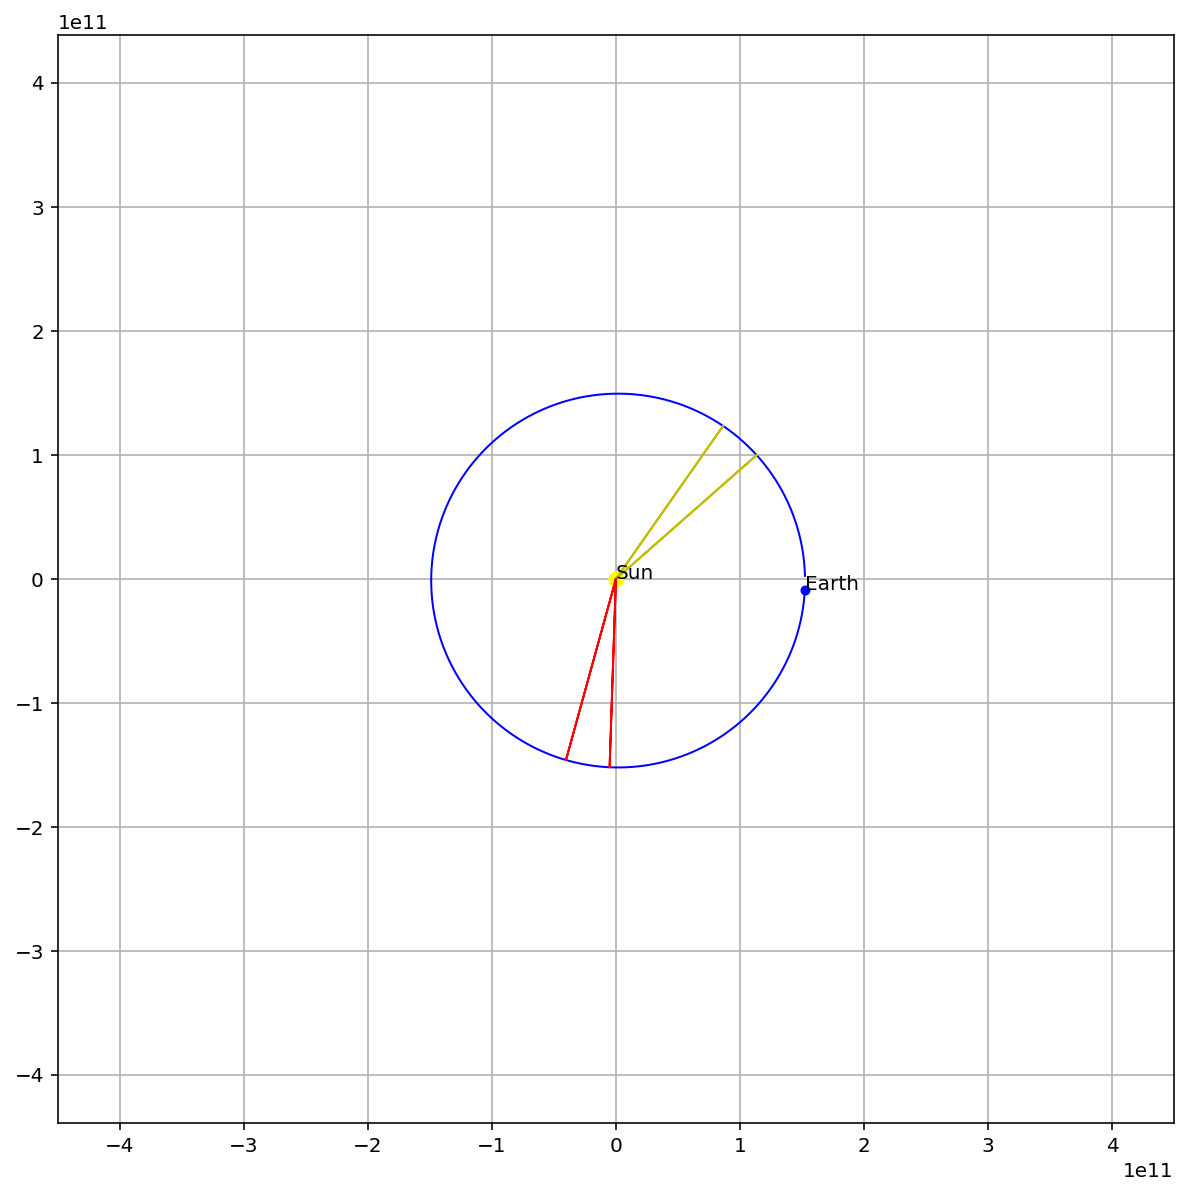

In [10]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
ax.grid()

line_x=[0]*(day-1);line_y=[0]*(day-1);
line1_x=[0]*(day+day_count-1);line1_y=[0]*(day+day_count-1);
line2_x=[0]*(other_day-1);line2_y=[0]*(other_day-1);
line3_x=[0]*(other_day+day_count-1);line3_y=[0]*(other_day+day_count-1)

line_x.append(xelist[day-1])
line_y.append(yelist[day-1])

line1_x.append(xelist[day_count+day-1])
line1_y.append(yelist[day_count+day-1])

line2_x.append(xelist[other_day-1])
line2_y.append(yelist[other_day-1])

line3_x.append(xelist[other_day+day_count-1])
line3_y.append(yelist[other_day+day_count-1])

for i in range(365-len(line_x)):
    line_x.append(0)
    line_y.append(0)
for i in range(365-len(line1_x)):
    line1_x.append(0)
    line1_y.append(0)

for i in range(365-len(line2_x)):
    line2_x.append(0)
    line2_y.append(0)
for i in range(365-len(line3_x)):
    line3_x.append(0)
    line3_y.append(0)

line_e,= ax.plot([],[],'-g',lw=1,c='blue')
point_e,= ax.plot([AU], [0], marker="o", markersize=4, markeredgecolor="blue", markerfacecolor="blue")
text_e = ax.text(AU,0,'Earth')

point_s, = ax.plot([0], [0], marker="o", markersize=7, markeredgecolor="yellow", markerfacecolor="yellow")
text_s = ax.text(0,0,'Sun')

exdata,eydata = [],[]# earth track
sxdata,sydata = [],[]# sun track

lnxdata,lnydata = [],[]
ln1xdata,ln1ydata = [],[]
ln2xdata,ln2ydata = [],[]
ln3xdata,ln3ydata = [],[]

print(len(xelist))

line,=ax.plot([],[],lw=1,color='y')
line1,=ax.plot([],[],lw=1,color='y')
line2,=ax.plot([],[],lw=1,color='r')
line3,=ax.plot([],[],lw=1,color='r')


def update(i):
    exdata.append(xelist[i])
    eydata.append(yelist[i])
    
    lnxdata.append(line_x[i])
    lnydata.append(line_y[i])
    ln1xdata.append(line1_x[i])
    ln1ydata.append(line1_y[i])
    ln2xdata.append(line2_x[i])
    ln2ydata.append(line2_y[i])
    ln3xdata.append(line3_x[i])
    ln3ydata.append(line3_y[i])


    line_e.set_data(exdata,eydata)
    line.set_data(lnxdata,lnydata)
    line1.set_data(ln1xdata,ln1ydata)
    line2.set_data(ln2xdata,ln2ydata)
    line3.set_data(ln3xdata,ln3ydata)
    
    point_e.set_data(xelist[i],yelist[i])
    text_e.set_position((xelist[i],yelist[i]))

    point_s.set_data(xslist[i],yslist[i])
    text_s.set_position((xslist[i],yslist[i]))
    ax.axis('equal')
    ax.set_xlim(-3*AU,3*AU)
    ax.set_ylim(-3*AU,3*AU)

    return line_e,point_s,point_e,text_e,text_s,line,line1,line2,line3,

anim = animation.FuncAnimation(fig,func=update,frames=len(xelist),interval =20,blit=True)

anim.save('basic_animation.mp4',fps=30,extra_args=['-vcodec','libx264'])